In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

from tensorflow import random

In [7]:
X = pd.read_csv('datasets/tree_class_feats.csv')
y = pd.read_csv('datasets/tree_class_target.csv')

print("Número de exemplos no dataset = ", X.shape[0])
print("Numero de features para cada exemplo = ", X.shape[1]) 
print("Possíveis classes de saída = ", np.unique(y))

Número de exemplos no dataset =  10000
Numero de features para cada exemplo =  10
Possíveis classes de saída =  [0 1]


In [10]:
np.random.seed(42)
random.set_seed(42)

In [11]:
model = Sequential()

In [14]:
model.add(Dense(10, activation='tanh', input_dim=10))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X, y, epochs=100, batch_size=5, validation_split=0.2, verbose=1, shuffle=False)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 235us/step - loss: 0.1486 - accuracy: 0.9439 - val_loss: 0.1528 - val_accuracy: 0.9410
Epoch 2/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.1484 - accuracy: 0.9441 - val_loss: 0.1528 - val_accuracy: 0.9405
Epoch 3/100
8000/8000 [==============================] - 1s 179us/step - loss: 0.1483 - accuracy: 0.9441 - val_loss: 0.1528 - val_accuracy: 0.9410
Epoch 4/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.1481 - accuracy: 0.9445 - val_loss: 0.1529 - val_accuracy: 0.9420
Epoch 5/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.1480 - accuracy: 0.9444 - val_loss: 0.1529 - val_accuracy: 0.9425
Epoch 6/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.1479 - accuracy: 0.9445 - val_loss: 0.1529 - val_accuracy: 0.9430
Epoch 7/100
8000/8000 [==============================] - 1s 179us/step

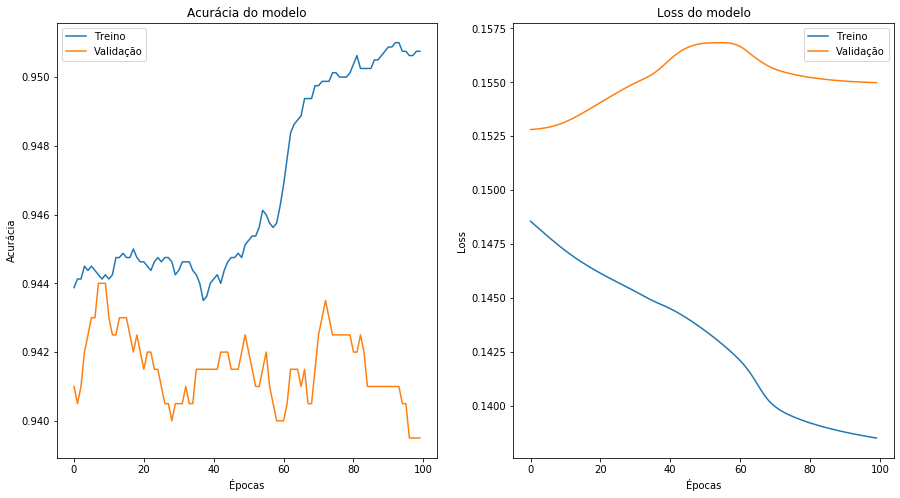

In [27]:
plt.figure(figsize=[15, 8])

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia do modelo')
plt.legend(['Treino', 'Validação'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss do modelo')
plt.legend(['Treino', 'Validação'])

plt.show()

In [30]:
preds = model.predict(X.iloc[0:10, :])
np.round(preds)

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)